In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")



In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.NObeyesdad.value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [5]:
df["CAEC_encoded"]=0
df.loc[df.CAEC=="no","CAEC_encoded"]=0
df.loc[df.CAEC=="Sometimes","CAEC_encoded"]=1
df.loc[df.CAEC=="Frequently","CAEC_encoded"]=2
df.loc[df.CAEC=="Always","CAEC_encoded"]=3

In [6]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,CAEC_encoded
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,1
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,1
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,1
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,1
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,1
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,1
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,1


In [7]:
df.CAEC_encoded.value_counts()

1    1765
2     242
3      53
0      51
Name: CAEC_encoded, dtype: int64

In [8]:
df["CALC_encoded"]=0
df.loc[df.CALC=="no","CALC_encoded"]=0
df.loc[df.CALC=="Sometimes","CALC_encoded"]=1
df.loc[df.CALC=="Frequently","CALC_encoded"]=2
df.loc[df.CALC=="Always","CALC_encoded"]=3

In [9]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,CAEC_encoded,CALC_encoded
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,1,0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,1,1
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,1,2
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,1,2
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,1,1
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,1,1
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,1,1
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,1,1


In [10]:
df.CALC_encoded.value_counts()

1    1401
0     639
2      70
3       1
Name: CALC_encoded, dtype: int64

In [11]:
df["NObeyesdad_encoded"]=0
df.loc[df.NObeyesdad=="Insufficient_Weight","NObeyesdad_encoded"]=0
df.loc[df.NObeyesdad=="Normal_Weight","NObeyesdad_encoded"]=1
df.loc[df.NObeyesdad=="Overweight_Level_I","NObeyesdad_encoded"]=2
df.loc[df.NObeyesdad=="Overweight_Level_II","NObeyesdad_encoded"]=3
df.loc[df.NObeyesdad=="Obesity_Type_I","NObeyesdad_encoded"]=4
df.loc[df.NObeyesdad=="Obesity_Type_II","NObeyesdad_encoded"]=5
df.loc[df.NObeyesdad=="Obesity_Type_III","NObeyesdad_encoded"]=6


In [12]:
df.NObeyesdad_encoded.value_counts()

4    351
6    324
5    297
2    290
3    290
1    287
0    272
Name: NObeyesdad_encoded, dtype: int64

In [13]:
df= pd.get_dummies(df, columns=['Gender','family_history_with_overweight', 'FAVC','SCC', 'SMOKE','MTRANS'],drop_first=True)


In [14]:
df.nunique(axis=0)

Age                                   1402
Height                                1574
Weight                                1525
FCVC                                   810
NCP                                    635
CAEC                                     4
CH2O                                  1268
FAF                                   1190
TUE                                   1129
CALC                                     4
NObeyesdad                               7
CAEC_encoded                             4
CALC_encoded                             4
NObeyesdad_encoded                       7
Gender_Male                              2
family_history_with_overweight_yes       2
FAVC_yes                                 2
SCC_yes                                  2
SMOKE_yes                                2
MTRANS_Bike                              2
MTRANS_Motorbike                         2
MTRANS_Public_Transportation             2
MTRANS_Walking                           2
dtype: int6

In [15]:
df.CAEC.value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CAEC                                2111 non-null   object 
 6   CH2O                                2111 non-null   float64
 7   FAF                                 2111 non-null   float64
 8   TUE                                 2111 non-null   float64
 9   CALC                                2111 non-null   object 
 10  NObeyesdad                          2111 non-null   object 
 11  CAEC_encoded                        2111 no

In [17]:
X=df.drop(['CAEC','NObeyesdad','CALC','NObeyesdad_encoded'],axis=1)
y=df["NObeyesdad_encoded"]

In [18]:
print("(Rows, columns): " + str(df.shape))
df.columns

(Rows, columns): (2111, 23)


Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'NObeyesdad', 'CAEC_encoded', 'CALC_encoded',
       'NObeyesdad_encoded', 'Gender_Male',
       'family_history_with_overweight_yes', 'FAVC_yes', 'SCC_yes',
       'SMOKE_yes', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [19]:
df.isnull().sum()

Age                                   0
Height                                0
Weight                                0
FCVC                                  0
NCP                                   0
CAEC                                  0
CH2O                                  0
FAF                                   0
TUE                                   0
CALC                                  0
NObeyesdad                            0
CAEC_encoded                          0
CALC_encoded                          0
NObeyesdad_encoded                    0
Gender_Male                           0
family_history_with_overweight_yes    0
FAVC_yes                              0
SCC_yes                               0
SMOKE_yes                             0
MTRANS_Bike                           0
MTRANS_Motorbike                      0
MTRANS_Public_Transportation          0
MTRANS_Walking                        0
dtype: int64

In [20]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CAEC_encoded,CALC_encoded,NObeyesdad_encoded,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SCC_yes,SMOKE_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,1.140692,0.731407,3.112269,0.505921,0.817622,0.883941,0.045476,0.020843,0.003316,0.005211,0.748460,0.026528
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,0.468543,0.515498,1.985062,0.500083,0.386247,0.320371,0.208395,0.142893,0.057502,0.072015,0.434001,0.160737
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


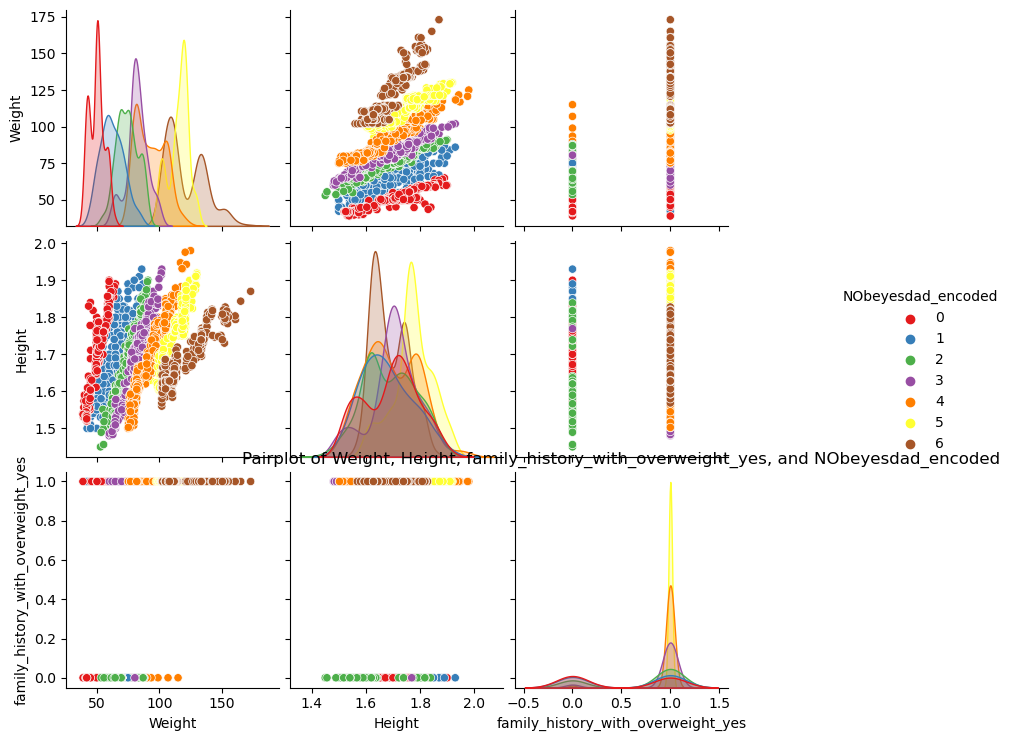

In [21]:
import seaborn as sns

# Assuming 'weight', 'height', 'physical_activity', and 'obesity_level' are numerical features in the DataFrame 'df'
sns.pairplot(df[['Weight', 'Height', 'family_history_with_overweight_yes', 'NObeyesdad_encoded']], hue='NObeyesdad_encoded', palette='Set1')
plt.title('Pairplot of Weight, Height, family_history_with_overweight_yes, and NObeyesdad_encoded')
plt.show()




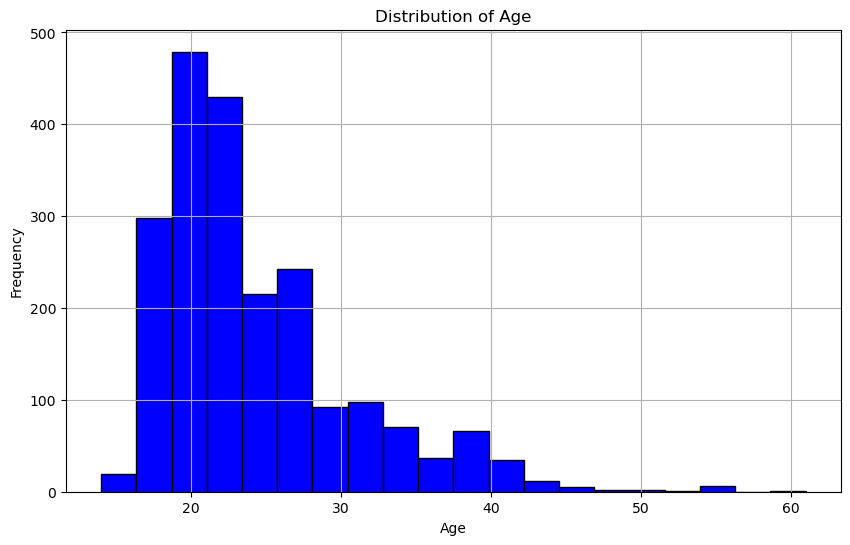

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the preprocessed dataset into a DataFrame called 'df'
plt.figure(figsize=(10, 6))
df['Age'].hist(bins=20, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


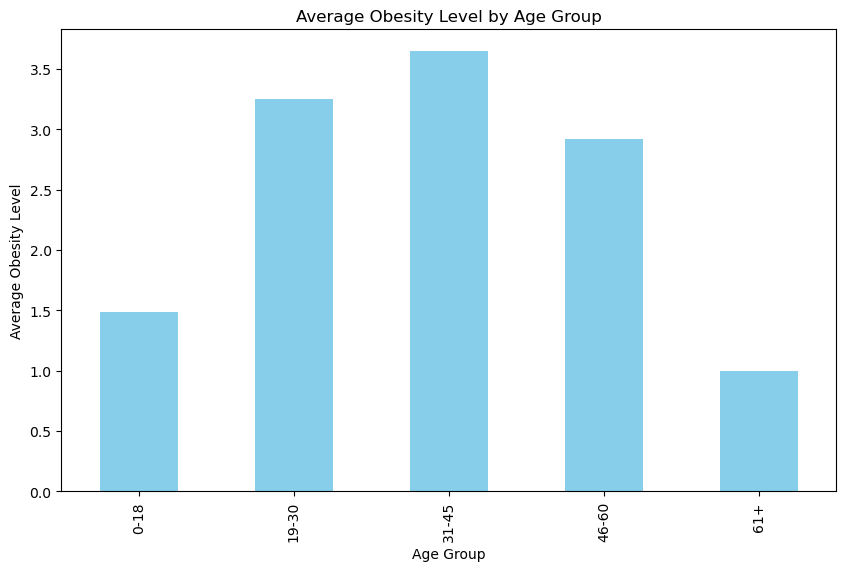

In [23]:
age_groups = df.groupby(pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '61+']))
average_obesity_level_by_age = age_groups['NObeyesdad_encoded'].mean()

plt.figure(figsize=(10, 6))
average_obesity_level_by_age.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Average Obesity Level')
plt.title('Average Obesity Level by Age Group')
plt.show()



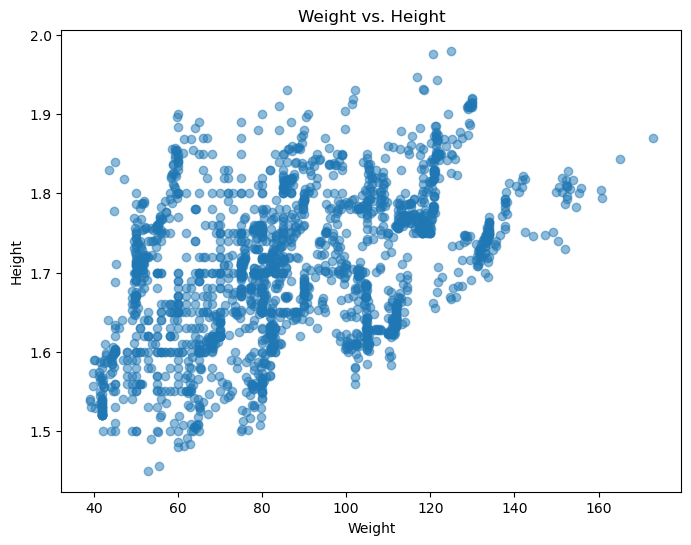

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Weight'], df['Height'], alpha=0.5)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs. Height')
plt.show()


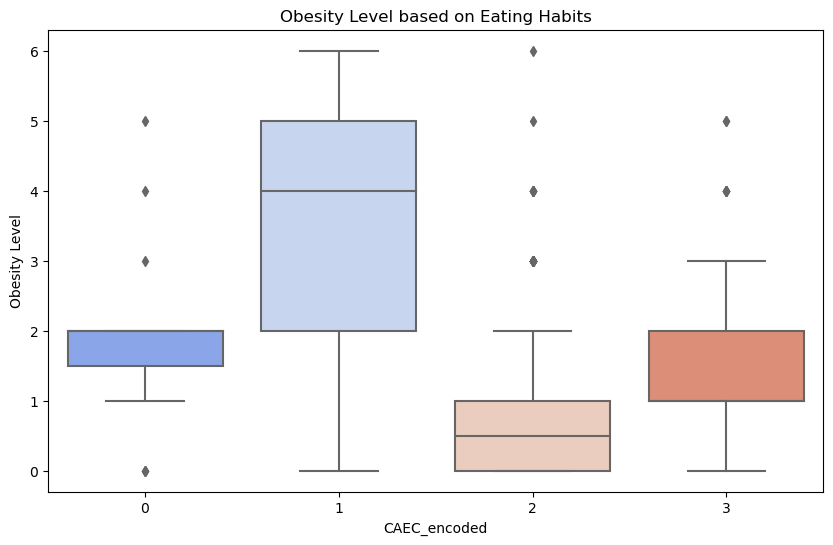

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CAEC_encoded', y='NObeyesdad_encoded', data=df, palette='coolwarm')
plt.xlabel('CAEC_encoded')
plt.ylabel('Obesity Level')
plt.title('Obesity Level based on Eating Habits')
plt.show()


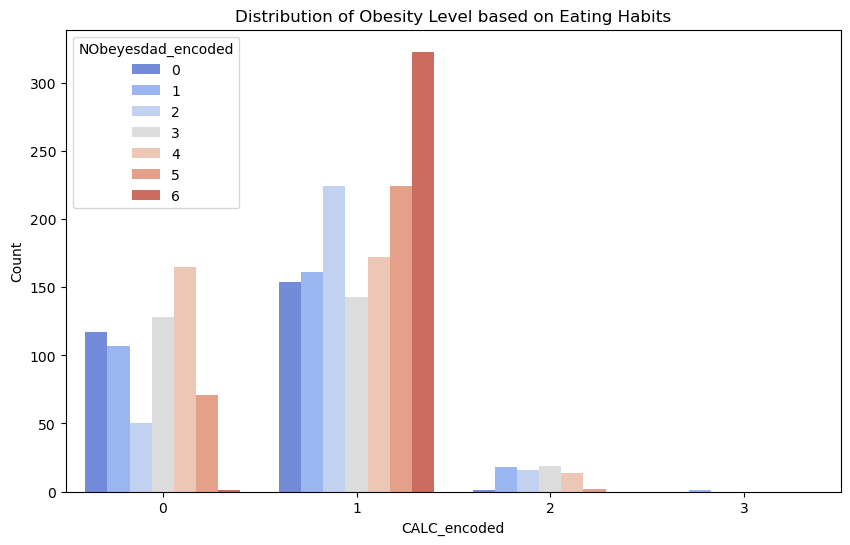

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CALC_encoded', hue='NObeyesdad_encoded', data=df, palette='coolwarm')
plt.xlabel('CALC_encoded')
plt.ylabel('Count')
plt.title('Distribution of Obesity Level based on Eating Habits')
plt.show()


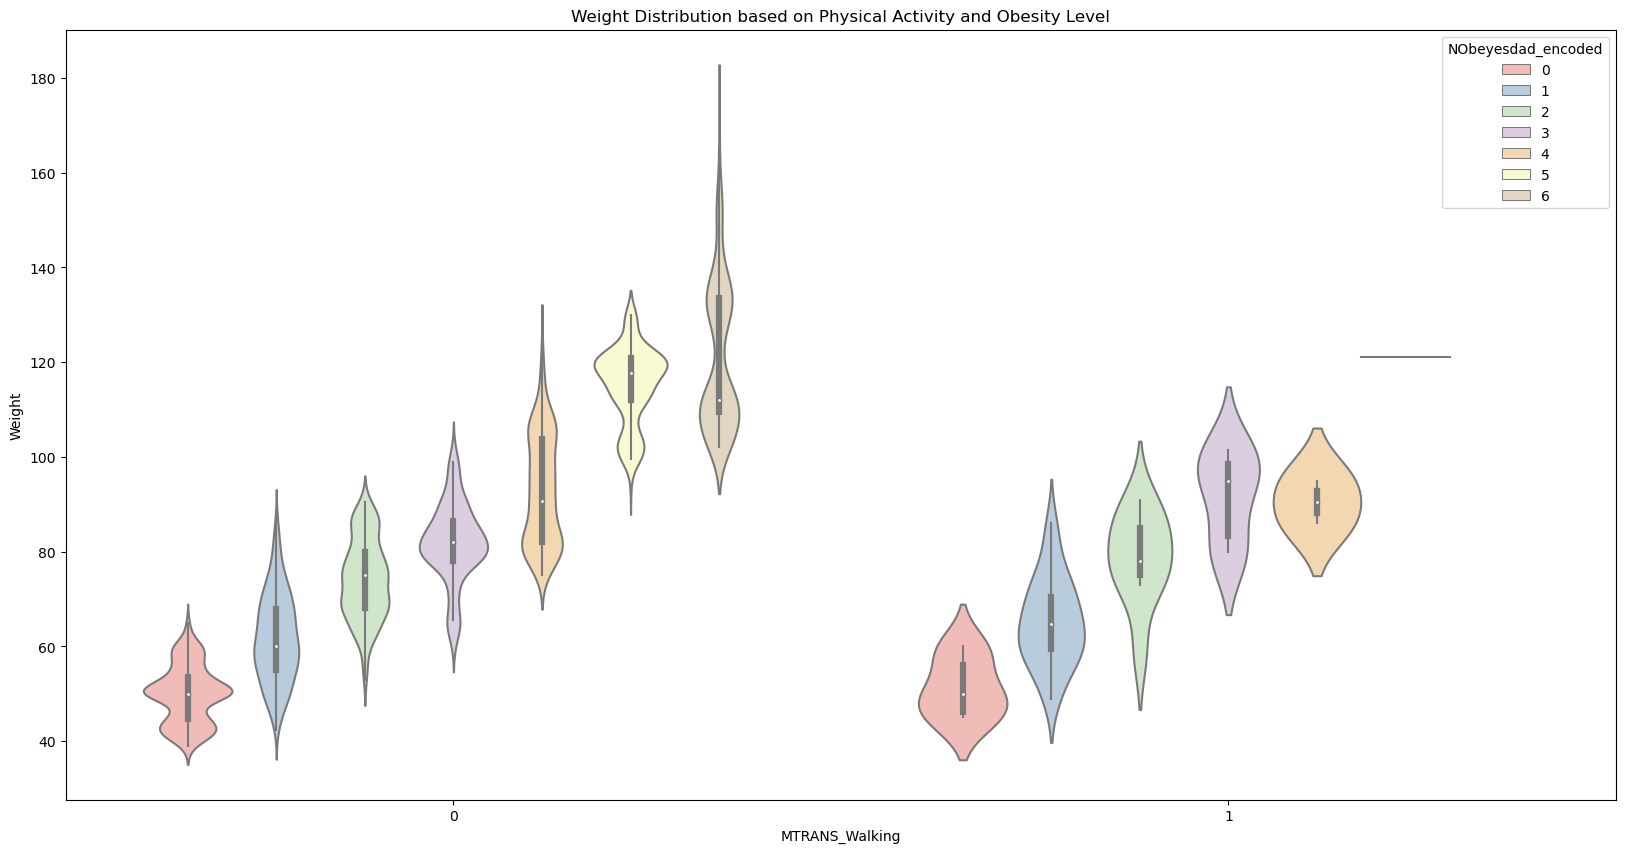

In [27]:
plt.figure(figsize=(20, 10))
sns.violinplot(x='MTRANS_Walking', y='Weight', hue='NObeyesdad_encoded', data=df, palette='Pastel1')
plt.xlabel('MTRANS_Walking')
plt.ylabel('Weight')
plt.title('Weight Distribution based on Physical Activity and Obesity Level')
plt.show()


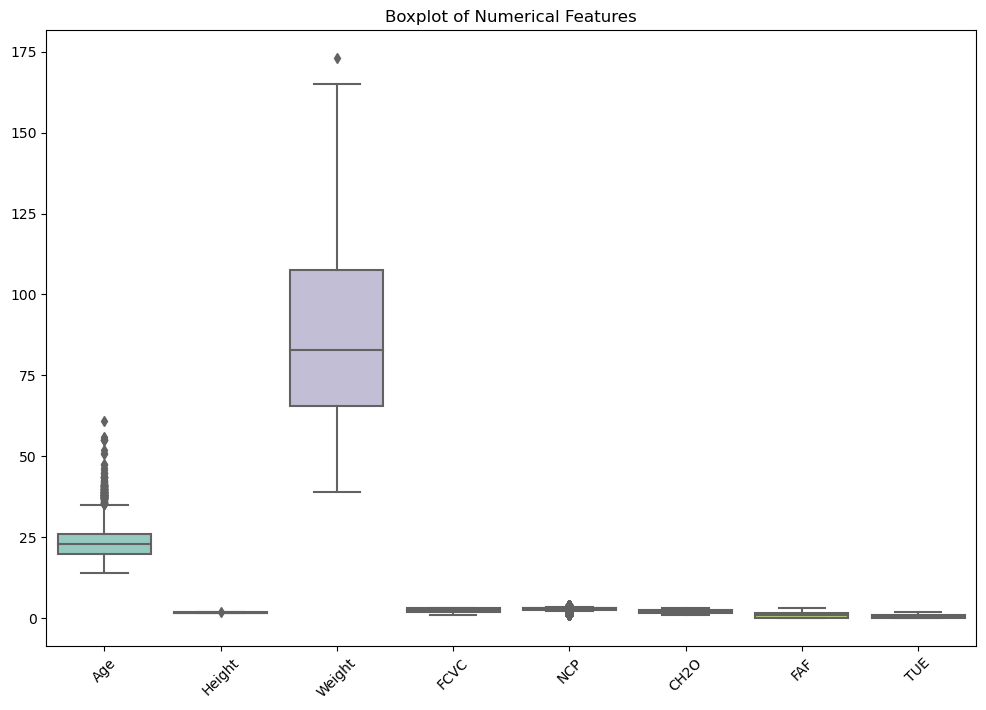

In [28]:
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_features], palette='Set3')
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()


C:\Users\classpc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\classpc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\classpc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\classpc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\classpc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.2% of 

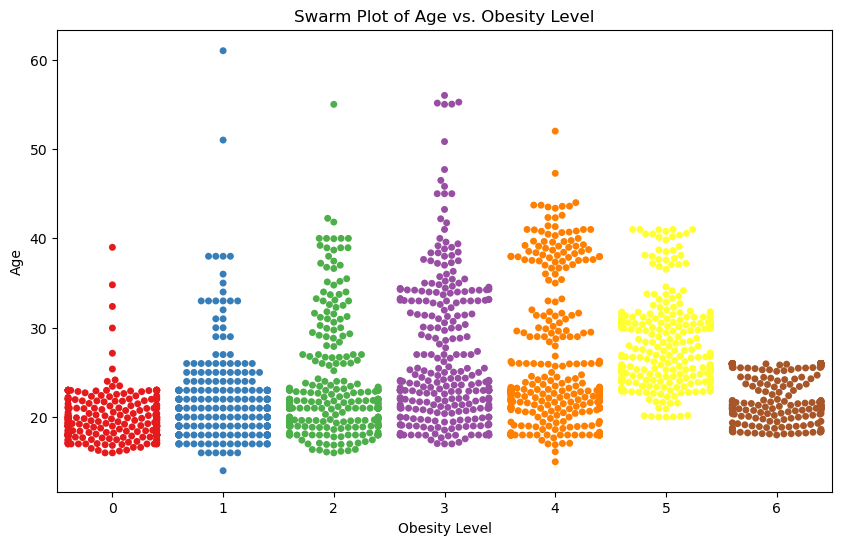

In [29]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='NObeyesdad_encoded', y='Age', data=df, palette='Set1')
plt.xlabel('Obesity Level')
plt.ylabel('Age')
plt.title('Swarm Plot of Age vs. Obesity Level')
plt.show()



In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[['Age', 'Weight', 'Height']] = scaler.fit_transform(X[['Age', 'Weight', 'Height']])


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [33]:
# Model Selection: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Model Training
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [34]:
# Model Evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9384858044164038


In [35]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        86
           1       0.80      0.92      0.86        93
           2       0.91      0.84      0.88        88
           3       0.96      0.94      0.95        79
           4       0.97      0.94      0.96       102
           5       0.97      0.99      0.98        88
           6       1.00      0.99      0.99        98

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[81,  5,  0,  0,  0,  0,  0],
       [ 2, 86,  5,  0,  0,  0,  0],
       [ 0, 12, 74,  2,  0,  0,  0],
       [ 0,  3,  1, 74,  1,  0,  0],
       [ 0,  1,  1,  1, 96,  3,  0],
       [ 0,  0,  0,  0,  1, 87,  0],
       [ 0,  0,  0,  0,  1,  0, 97]], dtype=int64)

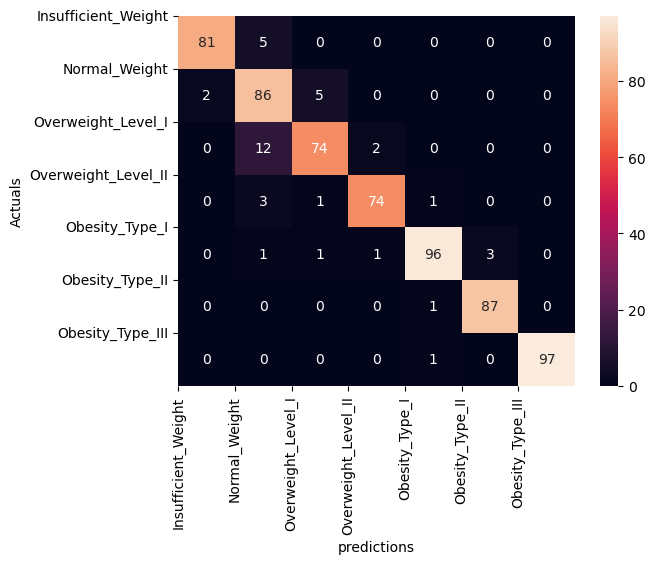

In [37]:
plt.figure()
sns.heatmap(cm,annot=True,fmt='d')
plt.ylabel("Actuals")
plt.xlabel("predictions")
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["Insufficient_Weight","Normal_Weight","Overweight_Level_I","Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"],rotation=90)
plt.yticks(ticks=[0,1,2,3,4,5,6],labels=["Insufficient_Weight","Normal_Weight","Overweight_Level_I","Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"],rotation=0)
plt.show()

In [38]:
# 2. Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [39]:
# Model Training: Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Model Evaluation
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.862776025236593
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90        86
           1       0.83      0.62      0.71        93
           2       0.75      0.70      0.73        88
           3       0.74      0.85      0.79        79
           4       0.97      0.88      0.92       102
           5       0.90      1.00      0.95        88
           6       1.00      0.99      0.99        98

    accuracy                           0.86       634
   macro avg       0.86      0.86      0.86       634
weighted avg       0.86      0.86      0.86       634

Confusion Matrix:
[[85  1  0  0  0  0  0]
 [18 58 12  5  0  0  0]
 [ 0 11 62 15  0  0  0]
 [ 0  0  9 67  3  0  0]
 [ 0  0  0  3 90  9  0]
 [ 0  0  0  0  0 88  0]
 [ 0  0  0  0  0  1 97]]


C:\Users\classpc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


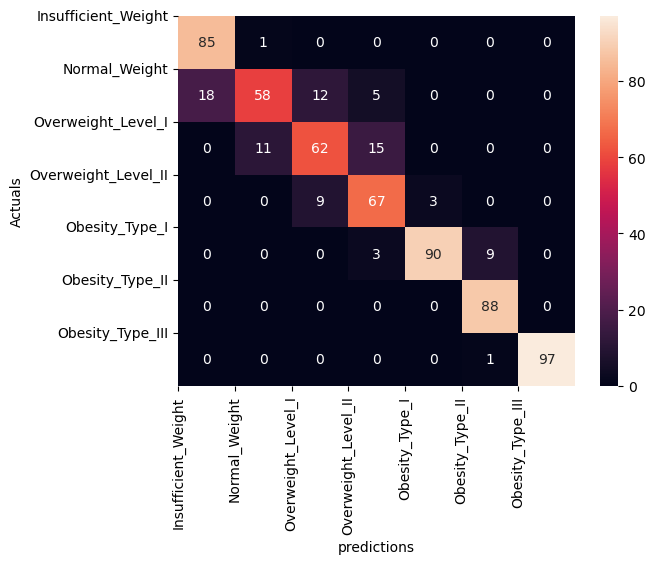

In [40]:
plt.figure()
sns.heatmap(cm,annot=True,fmt='d')
plt.ylabel("Actuals")
plt.xlabel("predictions")
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["Insufficient_Weight","Normal_Weight","Overweight_Level_I","Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"],rotation=90)
plt.yticks(ticks=[0,1,2,3,4,5,6],labels=["Insufficient_Weight","Normal_Weight","Overweight_Level_I","Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"],rotation=0)
plt.show()

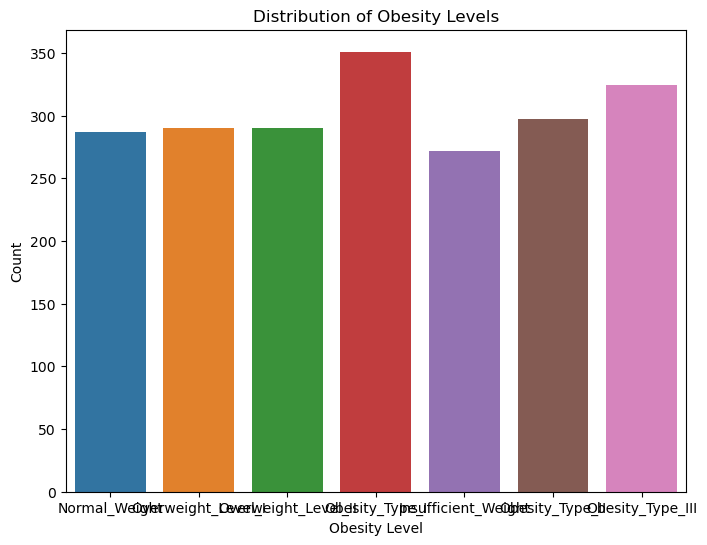

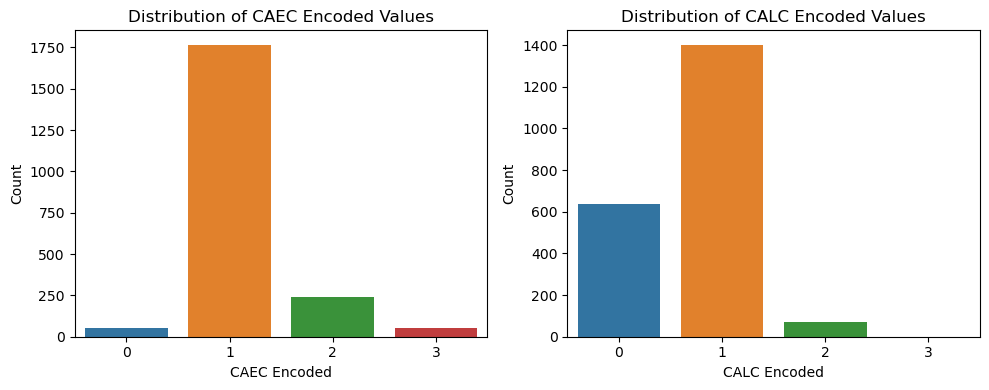

In [41]:
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NObeyesdad')
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show()

# Plotting the distribution of the encoded categorical variables
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='CAEC_encoded')
plt.title('Distribution of CAEC Encoded Values')
plt.xlabel('CAEC Encoded')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='CALC_encoded')
plt.title('Distribution of CALC Encoded Values')
plt.xlabel('CALC Encoded')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [42]:
! pip install xgboost

Accuracy: 0.9511041009463722
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        86
           1       0.90      0.86      0.88        93
           2       0.87      0.93      0.90        88
           3       1.00      0.97      0.99        79
           4       0.99      0.94      0.96       102
           5       0.96      0.99      0.97        88
           6       1.00      0.99      0.99        98

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



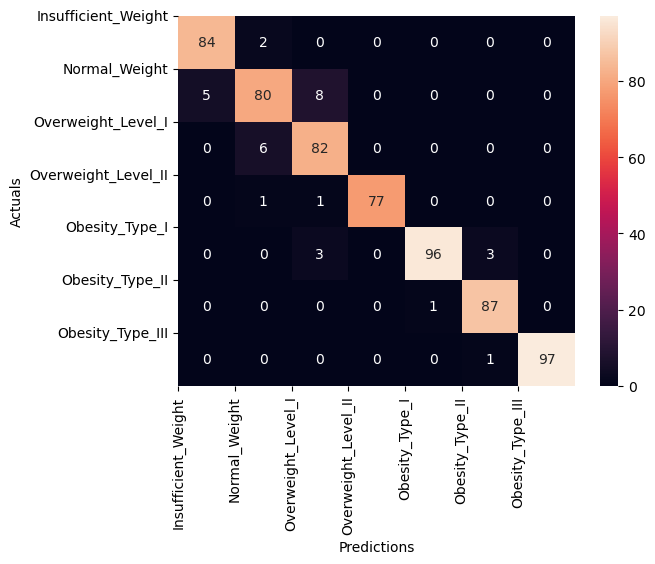

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the classifier on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Evaluate the performance of the XGBoost model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel("Actuals")
plt.xlabel("Predictions")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], rotation=90)
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], rotation=0)
plt.show()


Accuracy: 0.9495268138801262
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        86
           1       0.95      0.86      0.90        93
           2       0.86      0.94      0.90        88
           3       0.96      0.96      0.96        79
           4       0.97      0.92      0.94       102
           5       0.96      0.99      0.97        88
           6       1.00      0.99      0.99        98

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



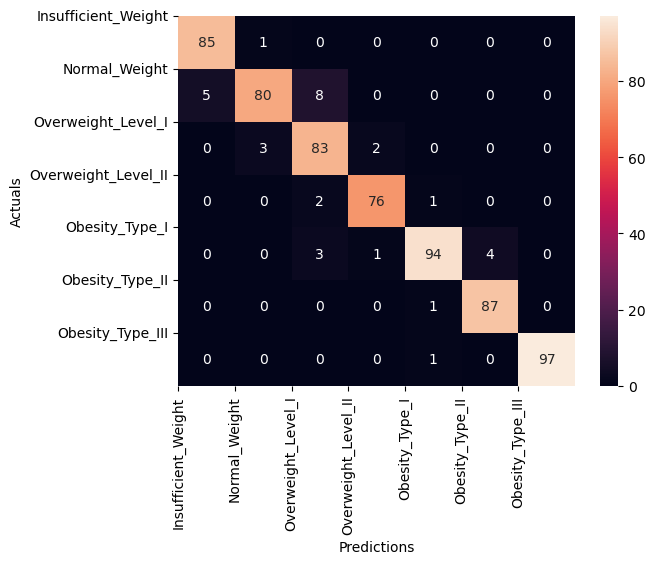

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the classifier on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb_model.predict(X_test)

# Evaluate the performance of the Gradient Boosting model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel("Actuals")
plt.xlabel("Predictions")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], rotation=90)
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], rotation=0)
plt.show()


Accuracy: 0.5757097791798107
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.99      0.62        86
           1       0.71      0.13      0.22        93
           2       0.45      0.17      0.25        88
           3       0.42      0.14      0.21        79
           4       0.41      0.64      0.50       102
           5       0.70      0.91      0.79        88
           6       1.00      0.99      0.99        98

    accuracy                           0.58       634
   macro avg       0.59      0.57      0.51       634
weighted avg       0.60      0.58      0.52       634



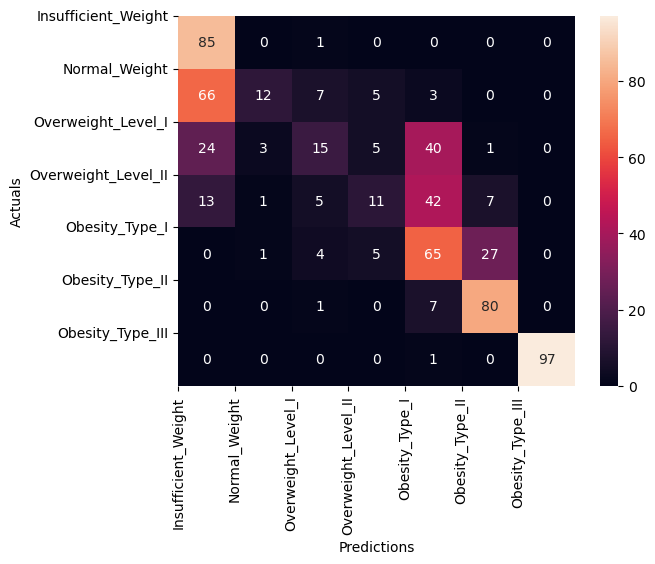

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the classifier on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_model.predict(X_test)

# Evaluate the performance of the Naive Bayes model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel("Actuals")
plt.xlabel("Predictions")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], rotation=90)
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], rotation=0)
plt.show()


Accuracy: 0.8848580441640379
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        86
           1       0.86      0.69      0.77        93
           2       0.73      0.76      0.74        88
           3       0.77      0.86      0.81        79
           4       1.00      0.91      0.95       102
           5       0.94      1.00      0.97        88
           6       1.00      1.00      1.00        98

    accuracy                           0.88       634
   macro avg       0.88      0.88      0.88       634
weighted avg       0.89      0.88      0.88       634



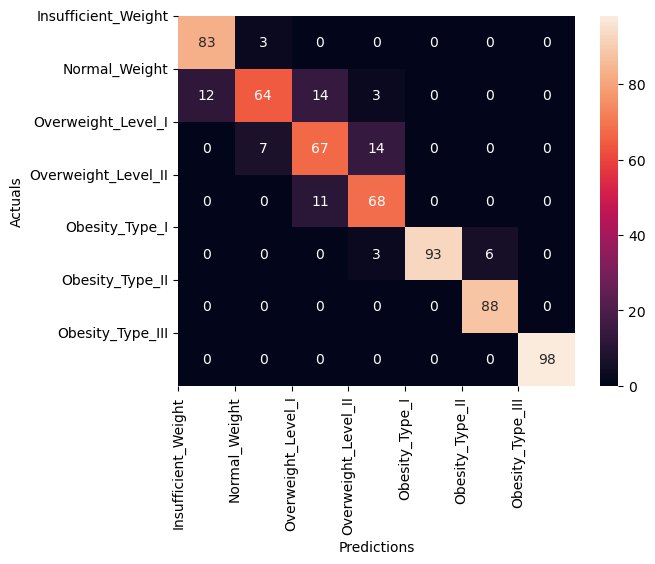

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the LDA classifier
lda_model = LinearDiscriminantAnalysis()

# Train the classifier on the training data
lda_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lda_model.predict(X_test)

# Evaluate the performance of the LDA model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel("Actuals")
plt.xlabel("Predictions")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], rotation=90)
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], rotation=0)
plt.show()


Accuracy: 0.9463722397476341
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        86
           1       0.97      0.82      0.89        93
           2       0.88      0.94      0.91        88
           3       0.94      0.92      0.93        79
           4       1.00      0.95      0.97       102
           5       0.96      1.00      0.98        88
           6       1.00      0.99      0.99        98

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.94       634
weighted avg       0.95      0.95      0.95       634



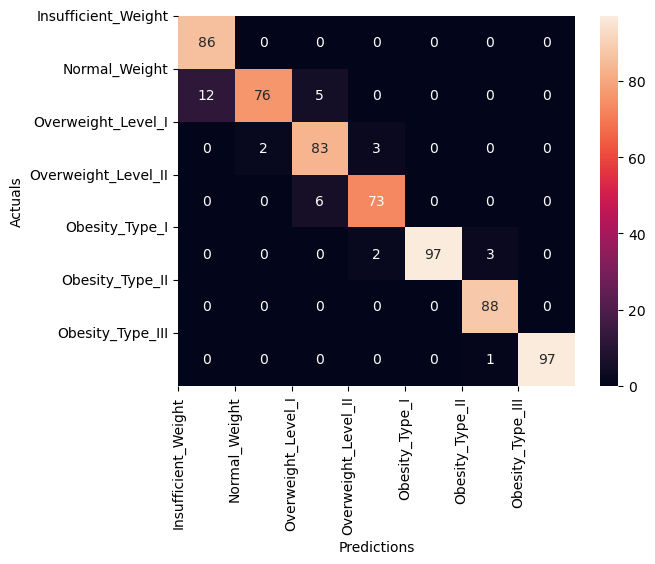

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the classifier on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Evaluate the performance of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel("Actuals")
plt.xlabel("Predictions")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], rotation=90)
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], rotation=0)
plt.show()


In [50]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the input shape (number of features)
input_shape = X_train.shape[1]

# Create the DNN model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_shape,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(7, activation='softmax')  # 7 classes for obesity levels
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/10
42/42 [==============================] - 2s 8ms/step - loss: 1.8011 - accuracy: 0.3935 - val_loss: 1.5832 - val_accuracy: 0.4797
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: 1.2969 - accuracy: 0.5959 - val_loss: 1.0605 - val_accuracy: 0.6892
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 0.8721 - accuracy: 0.7118 - val_loss: 0.7662 - val_accuracy: 0.6959
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: 0.6073 - accuracy: 0.8036 - val_loss: 0.5568 - val_accuracy: 0.8176
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4636 - accuracy: 0.8495 - val_loss: 0.4493 - val_accuracy: 0.8514
Epoch 6/10
42/42 [==============================] - 0s 4ms/step - loss: 0.3687 - accuracy: 0.8901 - val_loss: 0.3885 - val_accuracy: 0.8716
Epoch 7/10
42/42 [==============================] - 0s 5ms/step - loss: 0.3113 - accuracy: 0.9090 - val_loss: 0.3019 - val_accuracy: 0.9122
Epoch 8/10
42/42 [==

In [51]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold

# Load and preprocess the data (replace with your actual data preprocessing steps)
# Assuming X_train, X_test, y_train, and y_test are already defined

# Define the input shape (number of features)
input_shape = X_train.shape[1]

# Create the DNN model
def create_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(7, activation='softmax')  # 7 classes for obesity levels
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

fold_accuracies = []  # To store accuracies of each fold
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train)):
    print(f"Fold {fold + 1}:")
    X_train_fold, X_val_fold = X_train[train_indices], X_train[val_indices]
    y_train_fold, y_val_fold = y_train[train_indices], y_train[val_indices]

    model = create_model()
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

    _, accuracy = model.evaluate(X_val_fold, y_val_fold)
    fold_accuracies.append(accuracy)

# Calculate and print average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f"Average Accuracy: {average_accuracy}")


Fold 1:


KeyError: "None of [Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n            ...\n            1463, 1464, 1467, 1468, 1469, 1472, 1473, 1474, 1475, 1476],\n           dtype='int64', length=1181)] are in the [columns]"

In [ ]:
import pandas as pd
import numpy as np
from flask import Flask, jsonify, request

# Load the trained model (assuming you have already trained and serialized the model)
import joblib
model = joblib.load("your_model_file.pkl")

# Create an instance of the Flask application
app = Flask(__name__)

# Define the API endpoint for prediction
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get the input data from the request
    
    # Preprocess the input data if required (e.g., scaling, encoding)
    # Note: Make sure the preprocessing steps match the ones used during training
    
    # Perform model prediction
    predictions = model.predict(data)
    
    # Convert predictions to a JSON response
    response = {'predictions': predictions.tolist()}
    
    return jsonify(response)

# Start the Flask development server
if __name__ == '__main__':
    app.run(debug=True)


In [ ]:

# Model Optimization using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)